In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
df =  pd.read_csv('../data/sentiment_analysis.csv')

In [84]:
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [85]:
df = df[['text', 'sentiment']].copy()

In [86]:
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


<Axes: >

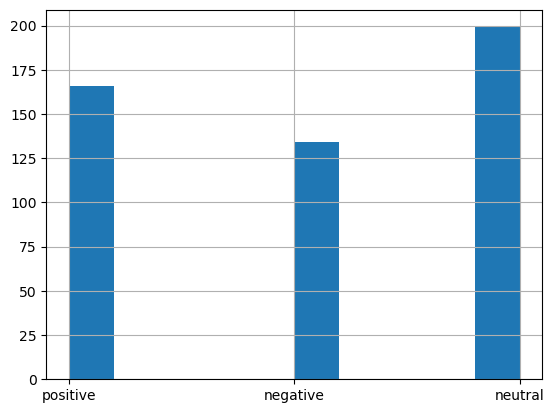

In [87]:
df['sentiment'].hist()

In [88]:
classificate_sentiment = {
    'positive': 1,
    'neutral': 0,
    'negative': -1,
}

df['target'] = df['sentiment'].map(classificate_sentiment)
df

,text,sentiment,target
0,What a great day!!! Looks like dream.,positive,1
1,"I feel sorry, I miss you here in the sea beach",positive,1
2,Don't angry me,negative,-1
3,We attend in the class just for listening teac...,negative,-1
4,"Those who want to go, let them go",negative,-1
...,...,...,...
494,"According to , a quarter of families under six...",negative,-1
495,the plan to not spend money is not going well,negative,-1
496,uploading all my bamboozle pictures of facebook,neutral,0
497,congratulations ! you guys finish a month ear...,positive,1


In [89]:
df_train, df_test = train_test_split(df)


# Datos de entrenamiento

In [90]:
df_train

,text,sentiment,target
107,Yor are so unromantic,negative,-1
33,That`s very funny. Cute kids.,positive,1
252,almost died. Laptop screen was set to 100% bri...,positive,1
224,sounds good,neutral,0
131,failed inspection.,negative,-1
...,...,...,...
393,"My sunburn is peeling,",negative,-1
431,Took a shift tomorrow. I don`t really feel ...,negative,-1
310,"Just opened a facebook account, I`m a little c...",positive,1
309,"I know It was worth a shot, though!",positive,1


# Datos de pruebas

In [91]:
df_test

,text,sentiment,target
211,just got up and updated my ipod,neutral,0
55,I AM SUCH A CREEPER I feel disappointed becau...,negative,-1
7,Soooo high,neutral,0
43,I`d rather do the early run..but I am a morni...,neutral,0
30,How looks like our company new logo?,positive,1
...,...,...,...
243,Let me know how that turns out!!,neutral,0
232,"If you followed us recently, PLEASE dont be of...",positive,1
115,thanks. before the major chop.,neutral,0
412,_x_ATL u mean jack barakat`s?! wow so have u e...,positive,1


In [92]:
vectorizer = TfidfVectorizer(max_features=2000)

In [93]:
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3826 stored elements and shape (374, 1223)>

In [94]:
X_test = vectorizer.transform(df_test['text'])
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1029 stored elements and shape (125, 1223)>

In [95]:
Y_train = df_train['target']
Y_test = df_test['target']

In [96]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9812834224598931
Test acc: 0.648


In [97]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [98]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96      , 0.04      , 0.        ],
       [0.        , 0.99342105, 0.00657895],
       [0.        , 0.01639344, 0.98360656]])

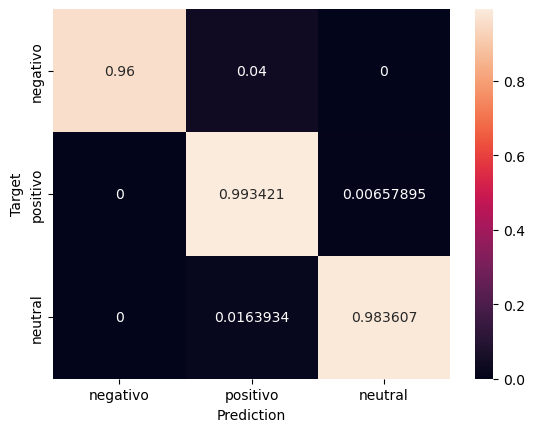

In [99]:
%run ../utils/plots.ipynb

plot(cm, ['negativo', 'positivo', 'neutral'])

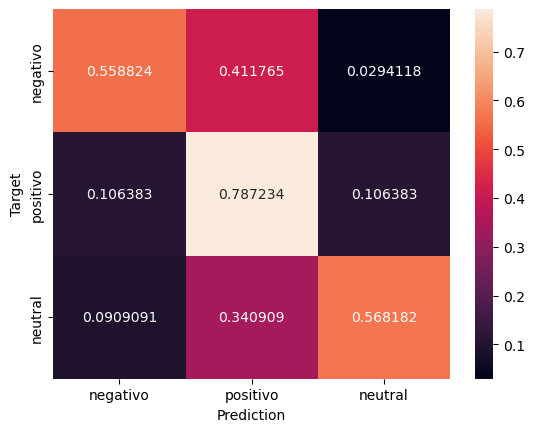

In [100]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot(cm, ['negativo', 'positivo', 'neutral'])

In [101]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'yor': np.int64(1216),
 'are': np.int64(80),
 'so': np.int64(955),
 'unromantic': np.int64(1107),
 'that': np.int64(1032),
 'very': np.int64(1126),
 'funny': np.int64(428),
 'cute': np.int64(266),
 'kids': np.int64(580),
 'almost': np.int64(56),
 'died': np.int64(295),
 'laptop': np.int64(592),
 'screen': np.int64(904),
 'was': np.int64(1149),
 'set': np.int64(913),
 'to': np.int64(1061),
 '100': np.int64(2),
 'brightness': np.int64(170),
 'after': np.int64(41),
 'reinstalled': np.int64(867),
 'windows': np.int64(1180),
 'vista': np.int64(1133),
 'got': np.int64(453),
 'headache': np.int64(485),
 'now': np.int64(747),
 'insanedefaults': np.int64(543),
 'sounds': np.int64(972),
 'good': np.int64(448),
 'failed': np.int64(369),
 'inspection': np.int64(545),
 'bouncing': np.int64(161),
 'rush': np.int64(893),
 'makes': np.int64(645),
 'me': np.int64(657),
 'feel': np.int64(384),
 'nauseous': np.int64(715),
 'gonna': np.int64(447),
 'celebrate': np.int64(203),
 'mothers': np.int64(697),
 

(array([  1.,   0.,   0.,   0.,   2.,   5.,   4.,  12.,  33.,  77., 281.,
        369.,  47., 128., 124.,  77.,  27.,  18.,   6.,   5.,   1.,   3.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([-9.46820357e-01, -8.67834522e-01, -7.88848687e-01, -7.09862852e-01,
        -6.30877017e-01, -5.51891182e-01, -4.72905347e-01, -3.93919512e-01,
        -3.14933677e-01, -2.35947841e-01, -1.56962006e-01, -7.79761714e-02,
         1.00966366e-03,  7.99954987e-02,  1.58981334e-01,  2.37967169e-01,
         3.16953004e-01,  3.95938839e-01,  4.74924674e-01,  5.53910509e-01,
         6.32896344e-01,  7.11882179e-01,  7.90868014e-01,  8.69853849e-01,
         9.48839684e-01,  1.02782552e+00,  1.10681135e+00,  1.18579719e+00,
         1.26478302e+00,  1.34376886e+00,  1.42275469e+00]),
 <BarContainer object of 30 artists>)

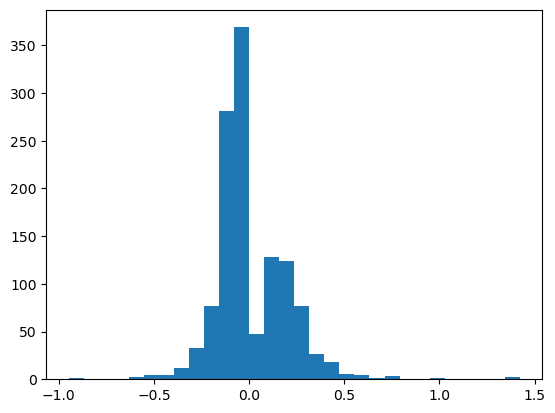

In [114]:
plt.hist(model.coef_[0], bins=30)

In [118]:
prueba = ['estuvo muy entretenida la pelicula', 'estuvo terrible la pelicula, me aburrio mucho', 'no la recomiendo']

x = vectorizer.transform(prueba)
P = model.predict(x)
clases = model.classes_

In [120]:
for i in range(len(prueba)):
    if clases[P_train[i]] == -1:
        print(f'El comentario: "{prueba[i]}" es: Negativo')
    elif clases[P_train[i]] == 1:
        print(f'El comentario: "{prueba[i]}" es: Positivo')
    else:
        print(f'El comentario: "{prueba[i]}" es: Neutral')

El comentario: "estuvo muy entretenida la pelicula" es: Positivo
El comentario: "estuvo terrible la pelicula, me aburrio mucho" es: Neutral
El comentario: "no la recomiendo" es: Neutral
